# Exercise 14 

## About Dataset

The data contains information from the 1990 California census. The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns of dataset are as follows:
- longitude
- latitude
- housingmedianage
- total_rooms
- total_bedrooms
- population
- households
- median_income
- medianhousevalue
- ocean_proximity

More information about the feature can be found this [table](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

[California Housing Dataset](https://www.kaggle.com/datasets/vikramtiwari/california-housing-dataset-ml-crash-course) from Kaggle. Dataset can be found also from Moodle.

## Dimensionality Reduction

Dimensionality Reduction is the process of reducing the number of dimensions in the data either by excluding less useful features (Feature Selection) or transform the data into lower dimensions (Feature Extraction). Dimensionality reduction prevents overfitting. Overfitting is a phenomenon in which the model learns too well from the training dataset and fails to generalize well for unseen real-world data.

## Exercise description

Use AutoEncoders for dimensionality reduction i.e. use the bottleneck layer  to reduce the dimensions. This process can be viewed as feature extraction.

### Hints

- The number of neurons in the layers of the encoder will be decreasing, for example 32 -> 7
- The number of neurons in the layers of the decoder will be increasing, for example 7 -> 32 
- The code size/ the number of neurons in bottleneck must be less than the number of features in the data
- Before feeding the data into the AutoEncoder the data must definitely be scaled between 0 and 1 using MinMaxScaler -> Use sigmoid activation function in the output layer which outputs values between 0 and 1.



In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [2]:
housing = fetch_california_housing(as_frame = True)
print(housing.DESCR)

# https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

# this is practically the same dataset, but less need for preprocessing or creating synthetic features

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df_housing = housing.frame
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df_housing.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
# The target variable is the median house value expressed in hundreds of thousands of dollars ($100,000)
y = df_housing[['MedHouseVal']].copy() # [[]] -> requirement by MinMaxScaler input shape that needs to be df with one column (num_sample,1)

# Features
X = df_housing.drop(['MedHouseVal'], axis = 1).copy()

In [8]:
y.head(5)

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [9]:
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
# Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [11]:
# Before feeding the data into the AutoEncoder the data must definitely be scaled between 0 and 1 using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scalero = MinMaxScaler()
scalero = scalero.fit(y_train)
y_train_scaled = scalero.transform(y_train)
y_test_scaled = scalero.transform(y_test)

y_train_scaled = y_train
y_test_scaled = y_test

In [12]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (14448, 8)
X_test shape: (6192, 8)
y_train shape: (14448, 1)
y_test shape: (6192, 1)


In [13]:
# Use AutoEncoders for dimensionality reduction i.e. use the bottleneck layer to reduce the dimensions. 
# This process can be viewed as feature extraction.

# The number of neurons in the layers of the encoder will be decreasing, for example 32 -> 7
# The number of neurons in the layers of the decoder will be increasing, for example 7 -> 32
# The code size/ the number of neurons in bottleneck must be less than the number of features in the data
# Use sigmoid activation function in the output layer which outputs values between 0 and 1.

In [14]:
n_inputs = X_train.shape[1]

# Define the encoder
# Note that batch normalization applies a transformation that maintains 
# the mean output close to 0 and the output standard deviation close to 1.


visible = Input(shape=(n_inputs,))

# encoder level 1: the 1st hidden layer with double the number of inputs in the dataset
e = Dense(n_inputs * 2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
#e = Dropout(0.5)(e)

# # encoder level 2: the 2nd hidden layer with the number of inputs in thte dataset
# e = Dense(n_inputs)(e)
# e = BatchNormalization()(e)
# e = LeakyReLU()(e)

# The code size/ the number of neurons in bottleneck must be less than the number of features in the data
n_bottleneck = n_inputs / 2
bottleneck = Dense(n_bottleneck)(e)

In [15]:
# Define the decoder, 

# decoder level 1: the 1st hidden layer with the number of inputs in the dataset
# in the input data and will use a linear activation function to output numeric values
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
#d = Dropout(0.5)(d)

# decoder level 2: the 2nd hidden layer with double the number of inputs in the dataset
# d = Dense(n_inputs * 2)(d)
# d = BatchNormalization()(d)
# d = LeakyReLU()(d)

# The output layer
# - will have the same number of nodes as there are columns
# - use sigmoid activation function to output values between 0 and 1
output = Dense(n_inputs, activation='sigmoid')(d) 

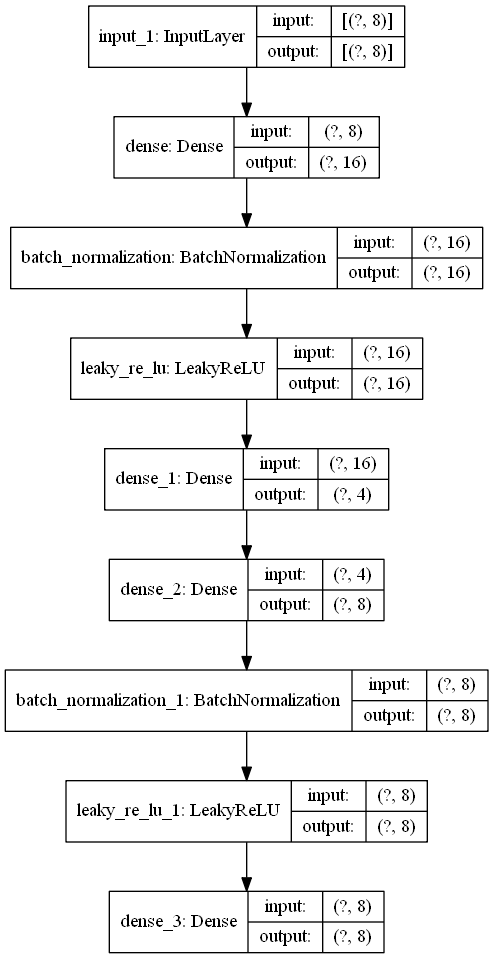

In [16]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

# compile autoencoder model
#opt = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum=0.9)
opt = tf.keras.optimizers.Adam(learning_rate = 0.1)
model.compile(optimizer=opt, loss='mse')

# Plot model
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [17]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4868 - val_loss: 2.4569
Epoch 2/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 3/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 4/200
903/903 [==============================] - 1s 877us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 5/200
903/903 [==============================] - 1s 858us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 6/200
903/903 [==============================] - 1s 871us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 7/200
903/903 [==============================] - 1s 883us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 8/200
903/903 [==============================] - 1s 855us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 9/200
903/903 [==============================] - 1s 886us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 10/200
903/903 [==============================] - 1s 997us/step - loss: 2

Epoch 80/200
903/903 [==============================] - 1s 961us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 81/200
903/903 [==============================] - 1s 867us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 82/200
903/903 [==============================] - 1s 880us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 83/200
903/903 [==============================] - 1s 879us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 84/200
903/903 [==============================] - 1s 861us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 85/200
903/903 [==============================] - 1s 862us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 86/200
903/903 [==============================] - 1s 884us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 87/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 88/200
903/903 [==============================] - 1s 872us/step - loss: 2.4804 - val_loss: 2.4569
Epoch 89/200
903/903 [==============================] - 1s 868us/s

903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 160/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 161/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 162/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 163/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 164/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 165/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 166/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 167/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - val_loss: 2.4569
Epoch 168/200
903/903 [==============================] - 1s 1ms/step - loss: 2.4804 - v

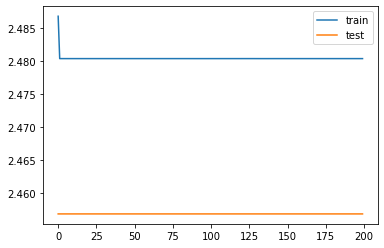

In [18]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

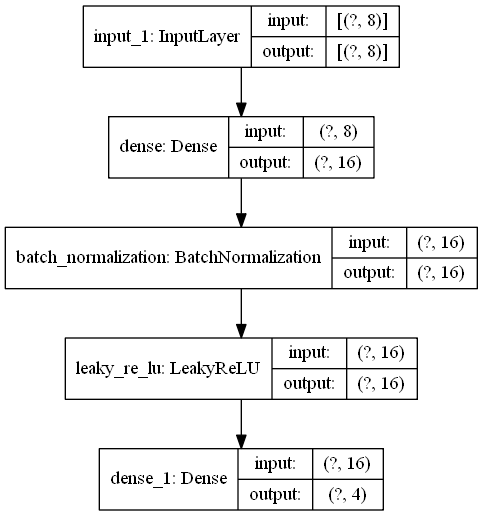

In [19]:
# define an encoder model (without the decoder)
encoder = Model(inputs = visible, outputs = bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

In [20]:
encoder.compile(optimizer='adam', loss='mse')
history_enc = encoder.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
903/903 [==============================] - 1s 944us/step - loss: 7.0183 - val_loss: 2.2707
Epoch 2/200
903/903 [==============================] - 1s 846us/step - loss: 1.2678 - val_loss: 0.9623
Epoch 3/200
903/903 [==============================] - 1s 884us/step - loss: 0.8286 - val_loss: 1.2680
Epoch 4/200
903/903 [==============================] - 1s 861us/step - loss: 0.7384 - val_loss: 0.8491
Epoch 5/200
903/903 [==============================] - 1s 882us/step - loss: 0.6998 - val_loss: 0.7508
Epoch 6/200
903/903 [==============================] - 1s 861us/step - loss: 0.6829 - val_loss: 0.8045
Epoch 7/200
903/903 [==============================] - 1s 852us/step - loss: 0.6564 - val_loss: 0.9179
Epoch 8/200
903/903 [==============================] - 1s 867us/step - loss: 0.6259 - val_loss: 0.9674
Epoch 9/200
903/903 [==============================] - 1s 866us/step - loss: 0.6114 - val_loss: 0.7020
Epoch 10/200
903/903 [==============================] - 1s 868us/step - l

903/903 [==============================] - 1s 919us/step - loss: 0.4961 - val_loss: 0.6007
Epoch 81/200
903/903 [==============================] - 1s 887us/step - loss: 0.5027 - val_loss: 0.7804
Epoch 82/200
903/903 [==============================] - 1s 874us/step - loss: 0.4933 - val_loss: 0.7094
Epoch 83/200
903/903 [==============================] - 1s 868us/step - loss: 0.4914 - val_loss: 0.6383
Epoch 84/200
903/903 [==============================] - 1s 845us/step - loss: 0.4870 - val_loss: 0.5153
Epoch 85/200
903/903 [==============================] - 1s 863us/step - loss: 0.4877 - val_loss: 0.6080
Epoch 86/200
903/903 [==============================] - 1s 863us/step - loss: 0.4875 - val_loss: 0.5967
Epoch 87/200
903/903 [==============================] - 1s 893us/step - loss: 0.4934 - val_loss: 0.4655
Epoch 88/200
903/903 [==============================] - 1s 959us/step - loss: 0.4910 - val_loss: 0.6541
Epoch 89/200
903/903 [==============================] - 1s 975us/step - loss:

Epoch 159/200
903/903 [==============================] - 1s 858us/step - loss: 0.4799 - val_loss: 0.5715
Epoch 160/200
903/903 [==============================] - 1s 848us/step - loss: 0.4794 - val_loss: 0.6023
Epoch 161/200
903/903 [==============================] - 1s 874us/step - loss: 0.4749 - val_loss: 0.5747
Epoch 162/200
903/903 [==============================] - 1s 848us/step - loss: 0.4880 - val_loss: 0.7901
Epoch 163/200
903/903 [==============================] - 1s 835us/step - loss: 0.4727 - val_loss: 0.5724
Epoch 164/200
903/903 [==============================] - 1s 942us/step - loss: 0.4783 - val_loss: 0.6575
Epoch 165/200
903/903 [==============================] - 1s 1ms/step - loss: 0.4840 - val_loss: 0.5840
Epoch 166/200
903/903 [==============================] - 1s 913us/step - loss: 0.4748 - val_loss: 0.5589
Epoch 167/200
903/903 [==============================] - 1s 892us/step - loss: 0.4745 - val_loss: 0.6041
Epoch 168/200
903/903 [==============================] - 

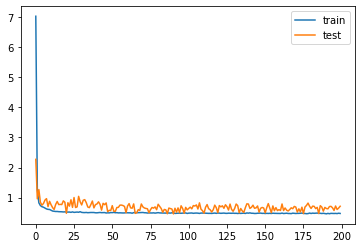

In [21]:
# plot loss
pyplot.plot(history_enc.history['loss'], label='train')
pyplot.plot(history_enc.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Conclusion

Write short conclusion about results, development process etc. 

Could not get this model produce sensible results, instead the loss looses all variance early on and there is no point in keep on training without changes. I started with version quite directly from the example. I tried deeper/shallower network. Tested dropout layers. Tested Relu. Tested different learning rates and optimizers. Scaled and then even unsclaed data. Had a look at the data. What I didn't do, is use the Kaggle dataset.